# Case of study: "Mushroom classification".

## TOC:
* [General information](#info)
* [Exploratory data analysis](#exploratory) 
* [Training and testing data](#tt)
    * [Neural Network](#nn1)
    * [XGBoost](#xgb1)
* [Features selection](#fs)
    * [Neural Network](#nn2)
    * [XGBoost](#xgb2)
* [Conclusion](#conclusion)

## General information <a class="anchor" id="info"></a>
The dataset is available at the [link](https://www.kaggle.com/datasets/uciml/mushroom-classification/data). 

This dataset includes descriptions of 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The dataset cointains the following features:
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a, descending=d, free=f, notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Exploratory data analysis  <a class="anchor" id="exploratory"></a>

In [93]:
'''Importing Python libraries'''
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
df = pd.read_csv('mushrooms.csv')

In [95]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [96]:
print('Checking Null values / missing values')
print('Total null values: ', sum(pd.isnull(df).any())) 


Checking Null values / missing values
Total null values:  0


Visualize the distribution of classes (edible/poisonus). The dataset is balanced


Text(0.5, 1.0, 'Distribution of classes')

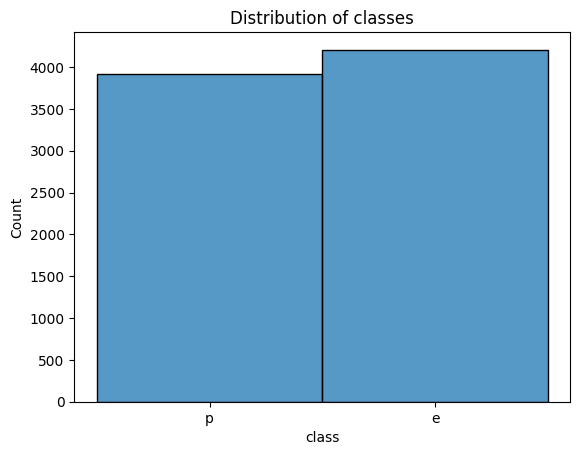

In [97]:
print('Visualize the distribution of classes (edible/poisonus). The dataset is balanced.')

sns.histplot(df['class'])
plt.title('Distribution of classes')

<Axes: xlabel='gill-color', ylabel='count'>

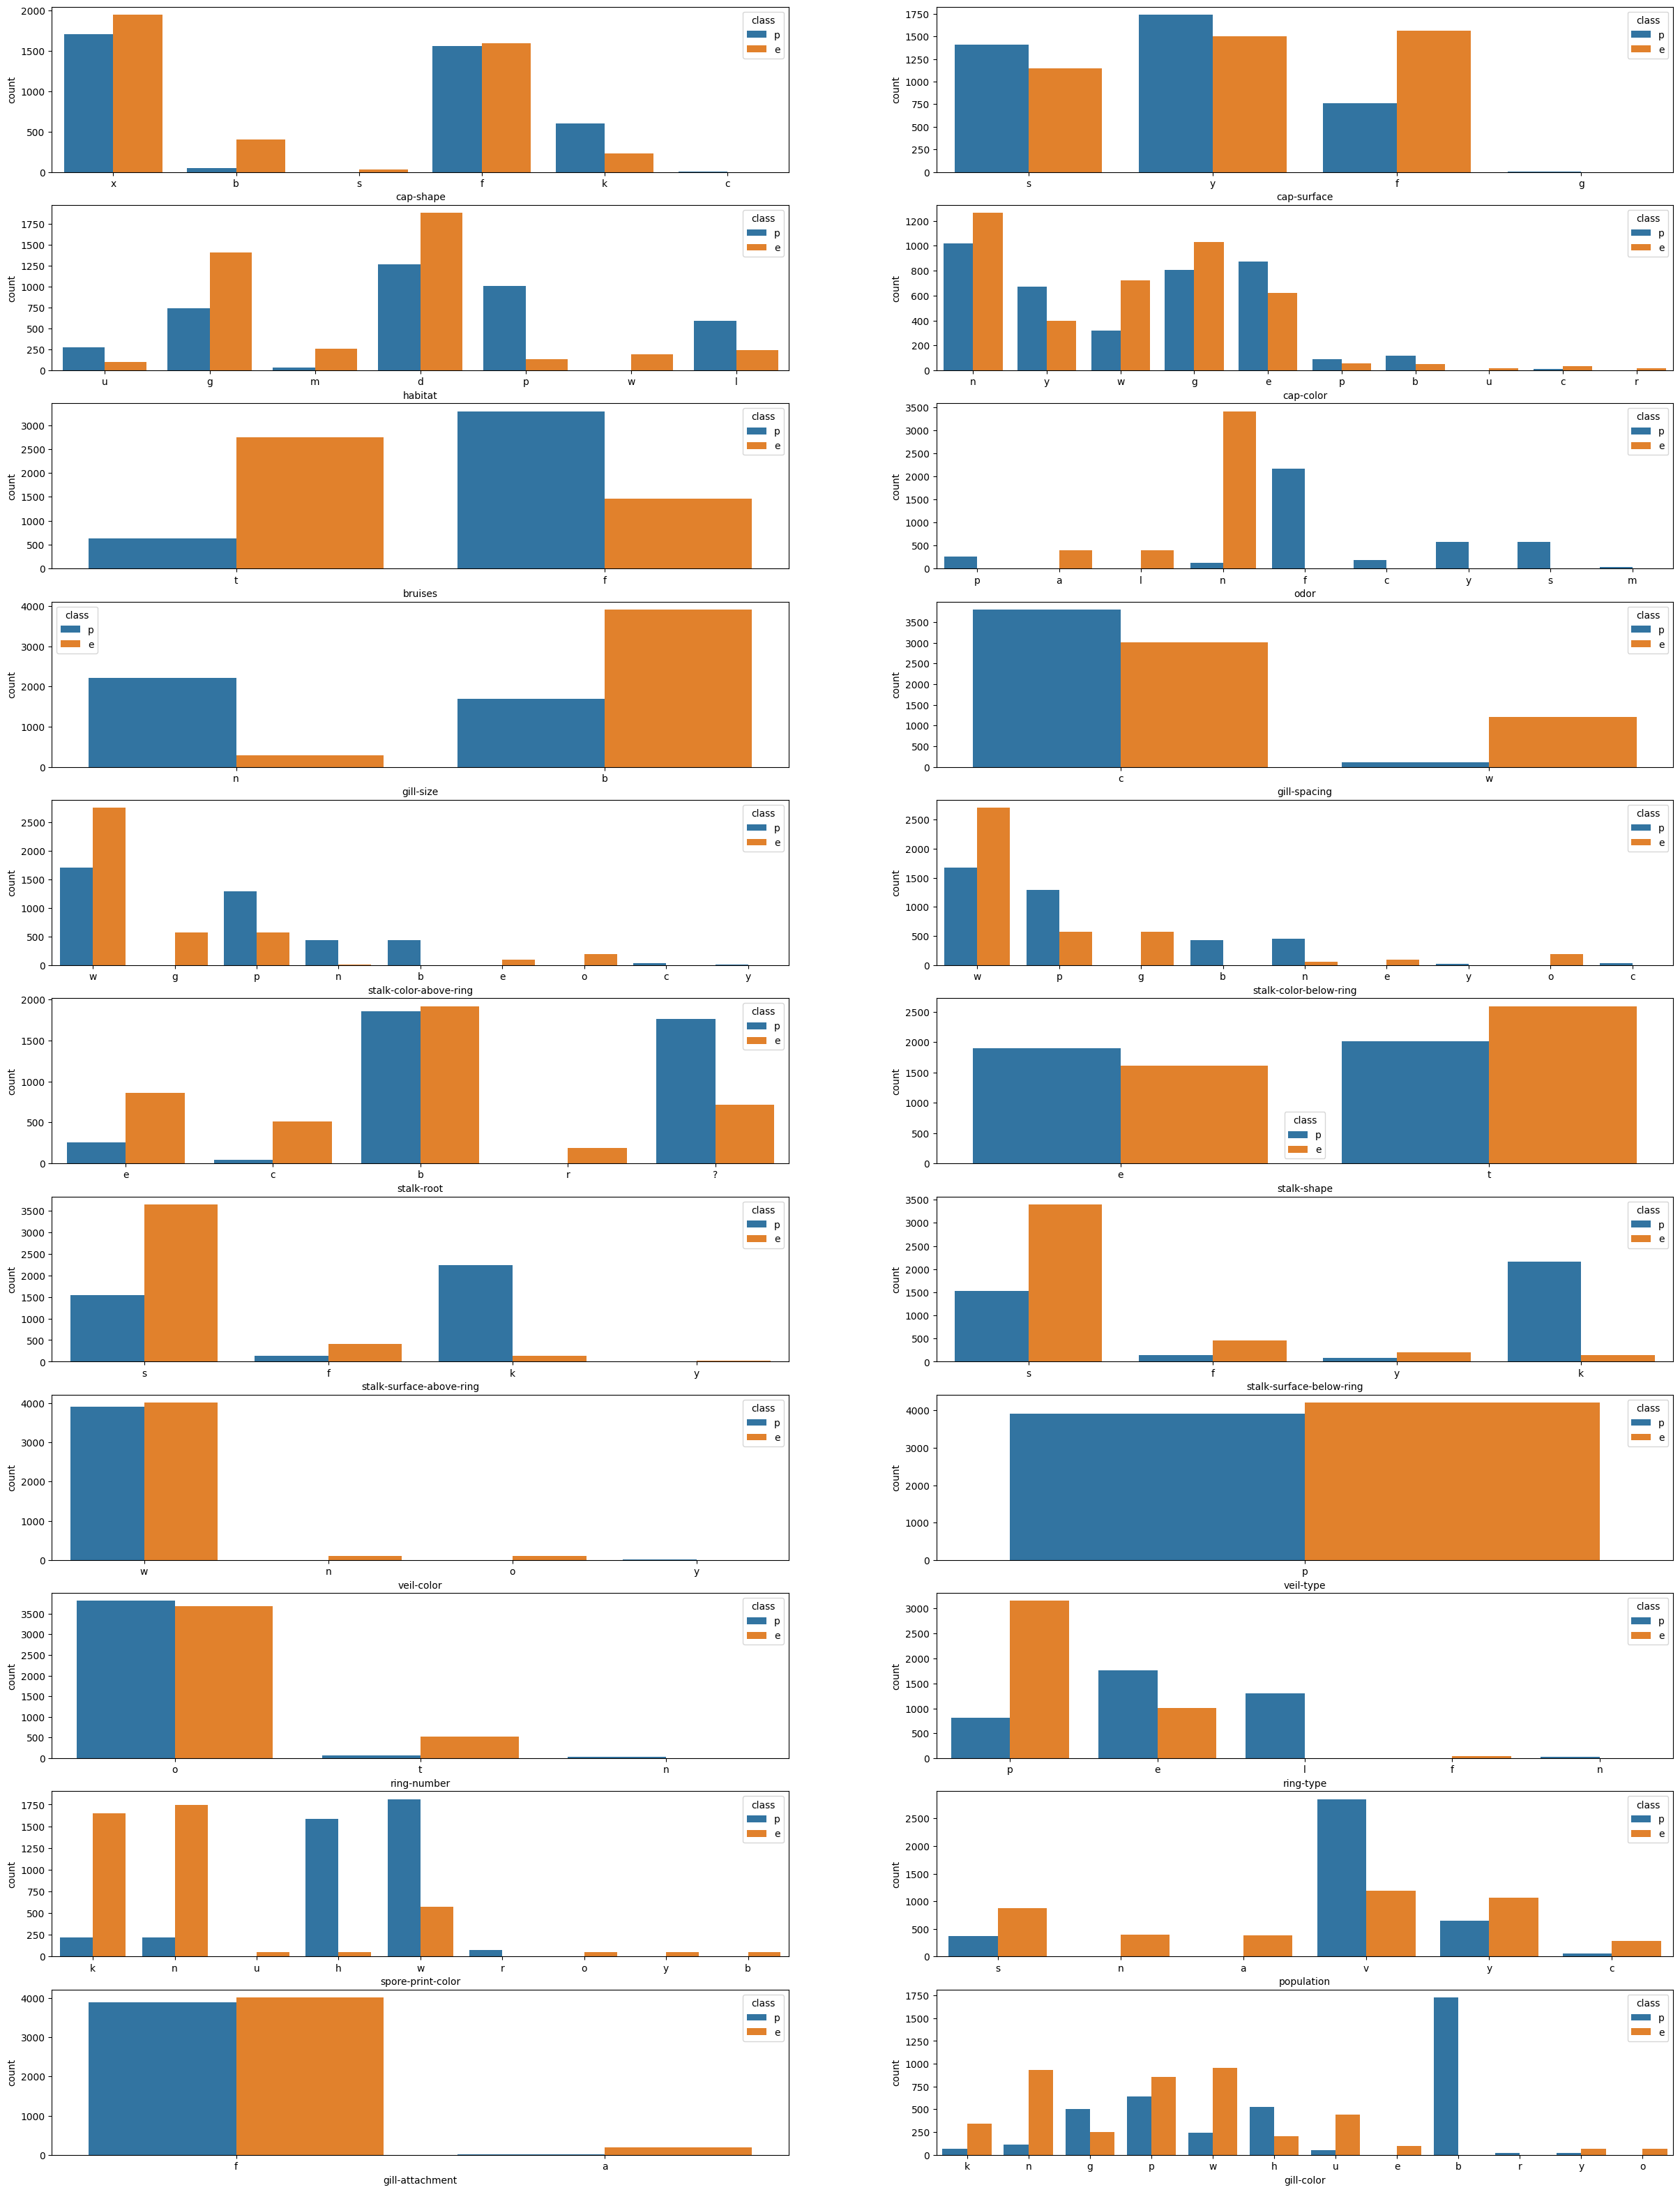

In [98]:
# Data distribution

fig,axes=plt.subplots(nrows=11, ncols=2, figsize=(30, 40))
sns.countplot(x=df['cap-shape'], hue=df['class'], ax=axes[0,0])
sns.countplot(x=df['cap-surface'], hue=df['class'], ax=axes[0,1])
sns.countplot(x=df['habitat'], hue=df['class'], ax=axes[1,0])
sns.countplot(x=df['cap-color'], hue=df['class'], ax=axes[1,1])
sns.countplot(x=df['bruises'], hue=df['class'], ax=axes[2,0])
sns.countplot(x=df['odor'], hue=df['class'], ax=axes[2,1])
sns.countplot(x=df['gill-size'], hue=df['class'], ax=axes[3,0])
sns.countplot(x=df['gill-spacing'], hue=df['class'], ax=axes[3,1])
sns.countplot(x=df['stalk-color-above-ring'], hue=df['class'], ax=axes[4,0])
sns.countplot(x=df['stalk-color-below-ring'], hue=df['class'], ax=axes[4,1])
sns.countplot(x=df['stalk-root'], hue=df['class'], ax=axes[5,0])
sns.countplot(x=df['stalk-shape'], hue=df['class'], ax=axes[5,1])
sns.countplot(x=df['stalk-surface-above-ring'], hue=df['class'], ax=axes[6,0])
sns.countplot(x=df['stalk-surface-below-ring'], hue=df['class'], ax=axes[6,1])
sns.countplot(x=df['veil-color'], hue=df['class'], ax=axes[7,0])
sns.countplot(x=df['veil-type'], hue=df['class'], ax=axes[7,1])
sns.countplot(x=df['ring-number'], hue=df['class'], ax=axes[8,0])
sns.countplot(x=df['ring-type'], hue=df['class'], ax=axes[8,1])
sns.countplot(x=df['spore-print-color'], hue=df['class'], ax=axes[9,0])
sns.countplot(x=df['population'], hue=df['class'], ax=axes[9,1])
sns.countplot(x=df['gill-attachment'], hue=df['class'], ax=axes[10,0])
sns.countplot(x=df['gill-color'], hue=df['class'], ax=axes[10,1])

## Training and testing data <a class="anchor" id="tt"></a>

In [99]:
import time
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import LabelEncoder



In [120]:
# Convert string labels to numeric values
labelencoder = LabelEncoder()
df2=df.copy()
for i in df2.columns:
    df2[i] = labelencoder.fit_transform(df2[i])
    df2[i].astype(int)    
df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Neural network  <a class="anchor" id="nn1"></a>

In [121]:
X = df2.drop(['class'], axis = 'columns')
Y = df2['class']

x_train, x_val, y_train, y_val = train_test_split(X,  Y, test_size=0.2,random_state=1)

myMLP = MLPClassifier(hidden_layer_sizes=(), max_iter=5000, activation = 'logistic', solver='sgd')
verbose = 1


start_time = time.time()
# Training
myMLP.fit(x_train, y_train)
end_time = time.time()

training_time_NN = end_time - start_time
print("Training time:", training_time_NN, "sec")



Training time: 0.8108069896697998 sec


In [122]:
# attributes of the trained classifier
print('current loss computed with the loss function: ', myMLP.loss_)
print('coefs: ', myMLP.coefs_)
print('intercepts: ', myMLP.intercepts_)
print('number of iterations of the solver: ', myMLP.n_iter_)
print('num of layers: ', myMLP.n_layers_)  # 2 layers in case of output + 1 hidden 
print('Num of outputs: ', myMLP.n_outputs_)

# Calculate predictions (classes, after thresholding!!)
Y_predicted = myMLP.predict(x_val)


current loss computed with the loss function:  0.20753521700978936
coefs:  [array([[ 0.03142189],
       [ 0.46666063],
       [-0.02580485],
       [-1.09282206],
       [-0.24809693],
       [ 0.25537437],
       [-2.05122523],
       [ 3.15073793],
       [-0.13807515],
       [-0.77255629],
       [-0.73029941],
       [-1.61000927],
       [-0.34990954],
       [-0.09291422],
       [-0.00395942],
       [ 0.06148629],
       [ 1.80337305],
       [-0.5072207 ],
       [ 0.1497252 ],
       [-0.11382884],
       [ 0.41083591],
       [ 0.23017116]])]
intercepts:  [array([0.47769385])]
number of iterations of the solver:  536
num of layers:  2
Num of outputs:  1


Class 1 is poisonous, 0 edible


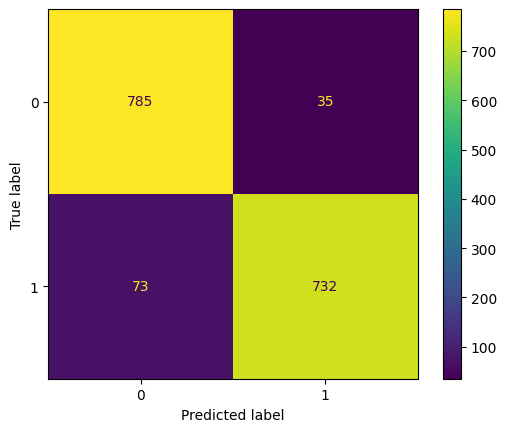

In [123]:
# Confusion matrix
cmNN = confusion_matrix(y_val, Y_predicted)
cm_display = ConfusionMatrixDisplay(cmNN)
cm_display.plot()
tn, fp, fn, tp = cmNN.ravel()
sensitivityNN = tp / (tp + fn)
specificityNN = tn / (tn + fp)
precisionNN = tp / (tp + fp)
accuracyNN = cmNN.trace()/cmNN.sum()

#Printing the accuracy
print('Class 1 is poisonous, 0 edible')


ROC-AUC of MLPClassifier:  0.9715846083926679


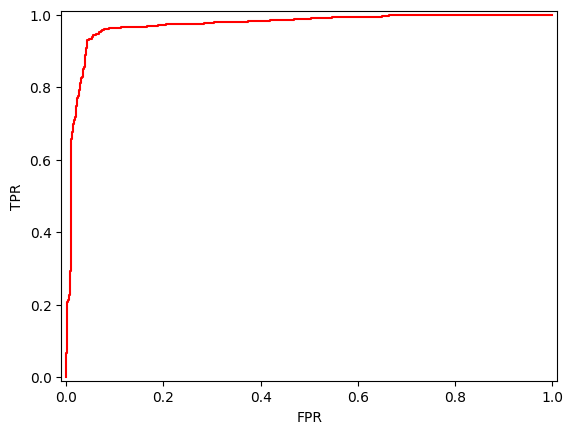

In [125]:
# ROC curves for each binary classification
Y_probab = myMLP.predict_proba(x_val) # Predict class probabilities for the input samples 
fpr, tpr, threshold = roc_curve(y_val, Y_probab[:,1]) 

# Calculate the area under the roc curve
print("ROC-AUC of MLPClassifier: ",roc_auc_score(y_val, Y_probab[:,1]))

# Finally plot the ROC curve
plt.plot(fpr, tpr, color = "red")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### XGBoost  <a class="anchor" id="xgb1"></a>

In [126]:
model2 = xgb.XGBClassifier()

start_time = time.time()
# Training
model2.fit(x_train,y_train)
end_time = time.time()

training_time_xgb = end_time - start_time
print("Training time:", training_time_xgb, "sec")


Training time: 0.10170507431030273 sec


Class 1 is poisonous, 0 edible


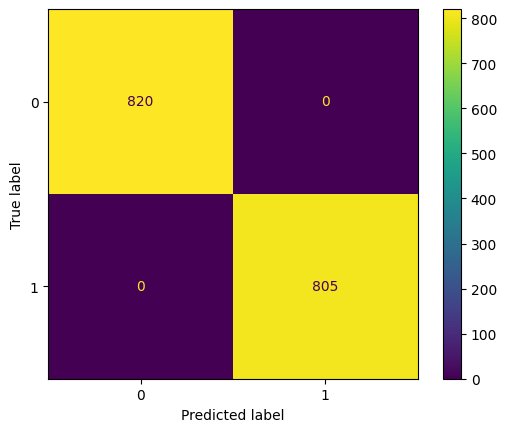

In [127]:
Y_predicted2= model2.predict(x_val)
# Confusion matrix
cmXG = confusion_matrix(y_val, Y_predicted2)
cm_display = ConfusionMatrixDisplay(cmXG)
cm_display.plot()

tn, fp, fn, tp = cmXG.ravel()
sensitivityXG = tp / (tp + fn)
specificityXG = tn / (tn + fp)
precisionXG = tp / (tp + fp)
accuracyXG = cmXG.trace()/cmXG.sum()

#Printing the accuracy
print('Class 1 is poisonous, 0 edible')




ROC-AUC of XGBoost Classifier:  1.0


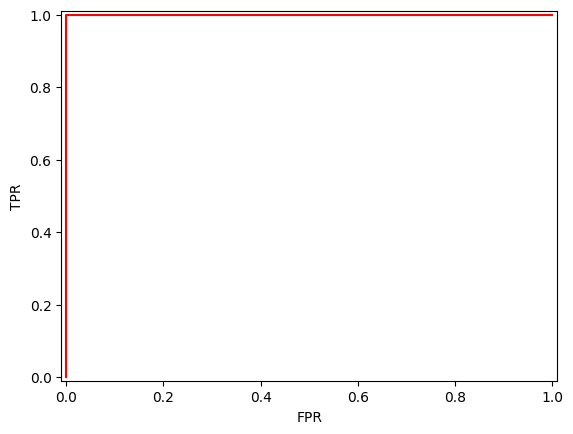

In [128]:
# ROC curves for each binary classification
Y_probab2 = model2.predict_proba(x_val) 
fpr, tpr, threshold = roc_curve(y_val, Y_probab2[:,1]) 

# Calculate the area under the roc curve
print("ROC-AUC of XGBoost Classifier: ",roc_auc_score(y_val, Y_probab2[:,1]))

# Finally plot the ROC curve
plt.plot(fpr, tpr, color = "red")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Features selection  <a class="anchor" id="fs"></a>
Feature selection is a crucial step in machine learning because it helps to direct the use of variables to what’s most efficient and effective for a given machine learning system. It is a fundamental technique that can help minimize the curse of dimensionality or help deal with overfitting. 
In addition it can also be useful in reducing computational costs.

SelectFromModel selects features based on importance weights. It takes an estimator as input and uses either the feature_importances_ or coef_ attribute of the estimator to determine the importance of each feature. Features whose importance is greater than or equal to a specified threshold are kept, while the others are discarded.
ExtraTreesClassifier is a classifier that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It also computes the feature importances, which can be used for feature selection.

In [129]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
importances = clf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print features by importance
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape             

1. gill-size (0.135657)
2. odor (0.120166)
3. bruises (0.103586)
4. stalk-root (0.073852)
5. stalk-surface-above-ring (0.072575)
6. gill-spacing (0.068502)
7. spore-print-color (0.068222)
8. ring-type (0.062120)
9. gill-color (0.050027)
10. stalk-shape (0.047007)
11. stalk-surface-below-ring (0.042371)
12. population (0.035479)
13. habitat (0.030073)
14. ring-number (0.018983)
15. stalk-color-above-ring (0.018033)
16. stalk-color-below-ring (0.016924)
17. cap-surface (0.013947)
18. cap-color (0.008456)
19. veil-color (0.005716)
20. cap-shape (0.005304)
21. gill-attachment (0.002999)
22. veil-type (0.000000)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(8124, 10)

### Neural network  <a class="anchor" id="nn2"></a>
We train a neural network using the reduced dataset. The first 8 features with the highest score are used for training.

In [130]:
x2_train, x2_val, y2_train, y2_val = train_test_split(X_new,  Y, test_size=0.2,random_state=1)

myMLP2 = MLPClassifier(hidden_layer_sizes=(), max_iter=5000, activation = 'logistic', solver='sgd')
verbose = 1


start_time = time.time()
# Training
myMLP2.fit(x2_train, y2_train)
end_time = time.time()

training_time_NN_reduct = end_time - start_time
print("Training time:", training_time_NN_reduct, "sec")

Training time: 0.8836300373077393 sec


current loss computed with the loss function:  0.23162581199103327
coefs:  [array([[-1.36948585],
       [-0.29127805],
       [-3.28799443],
       [ 3.54744341],
       [-0.09942385],
       [-0.10255061],
       [-0.3675287 ],
       [-1.37514778],
       [ 0.06883524],
       [-0.0763759 ]])]
intercepts:  [array([4.31626104])]
number of iterations of the solver:  618
num of layers:  2
Num of outputs:  1
Class 1 is poisonous, 0 edible


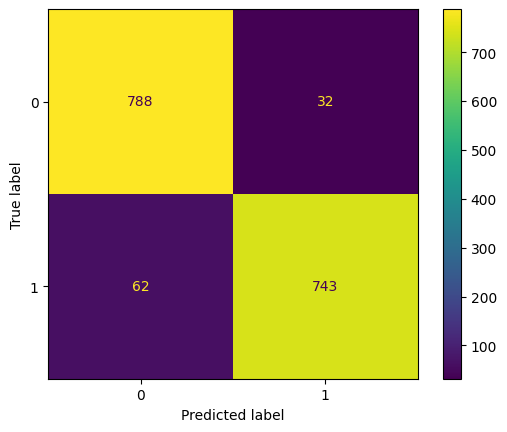

In [131]:
# attributes of the trained classifier
print('current loss computed with the loss function: ', myMLP2.loss_)
print('coefs: ', myMLP2.coefs_)
print('intercepts: ', myMLP2.intercepts_)
print('number of iterations of the solver: ', myMLP2.n_iter_)
print('num of layers: ', myMLP2.n_layers_)  # 2 layers in case of output + 1 hidden 
print('Num of outputs: ', myMLP2.n_outputs_)

# Calculate predictions (classes, after thresholding!!)
Y_predicted3 = myMLP2.predict(x2_val)

# Confusion matrix
cmNNR = confusion_matrix(y2_val, Y_predicted3)
cm_display = ConfusionMatrixDisplay(cmNNR)
cm_display.plot()

tn, fp, fn, tp = cmNNR.ravel()
sensitivityNNR = tp / (tp + fn)
specificityNNR = tn / (tn + fp)
precisionNNR = tp / (tp + fp)
accuracyNNR = cmNNR.trace()/cmNNR.sum()

#Printing the accuracy
print('Class 1 is poisonous, 0 edible')



ROC-AUC of MLPClassifier:  0.9521133161642176


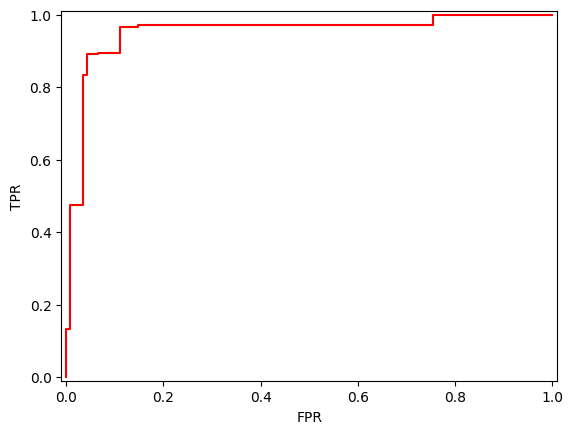

In [111]:
# ROC curves for each binary classification
Y_probab3 = myMLP.predict_proba(x2_val) 
fpr2, tpr2, threshold = roc_curve(y2_val, Y_probab3[:,1]) 

# Calculate the area under the roc curve
print("ROC-AUC of MLPClassifier: ",roc_auc_score(y2_val, Y_probab3[:,1]))

# Finally plot the ROC curve
plt.plot(fpr2, tpr2, color = "red")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### XGBoost  <a class="anchor" id="xgb2"></a>

In [132]:
model3 = xgb.XGBClassifier()

start_time = time.time()
# Training
model3.fit(x2_train,y2_train)
end_time = time.time()

training_time_xgb_red = end_time - start_time
print("Training time:", training_time_xgb_red, "sec")


Training time: 0.09940719604492188 sec


Class 1 is poisonous, 0 edible


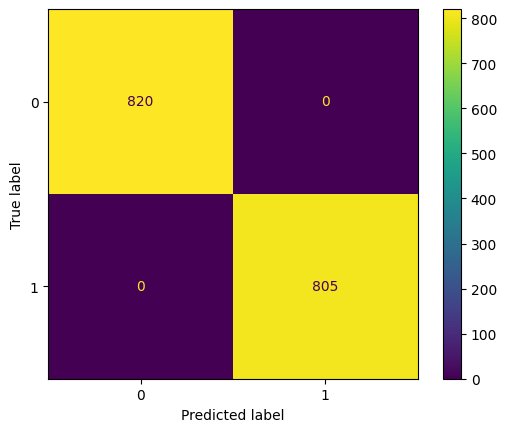

In [133]:
Y_predicted4= model3.predict(x2_val)
# Confusion matrix
cmXGR = confusion_matrix(y2_val, Y_predicted4)
cm_display = ConfusionMatrixDisplay(cmXGR)
cm_display.plot()

tn, fp, fn, tp = cmXGR.ravel()
sensitivityXGR = tp / (tp + fn)
specificityXGR = tn / (tn + fp)
precisionXGR = tp / (tp + fp)
accuracyXGR = cmXGR.trace()/cmXGR.sum()

#Printing the accuracy
print('Class 1 is poisonous, 0 edible')

ROC-AUC of MLPClassifier:  1.0


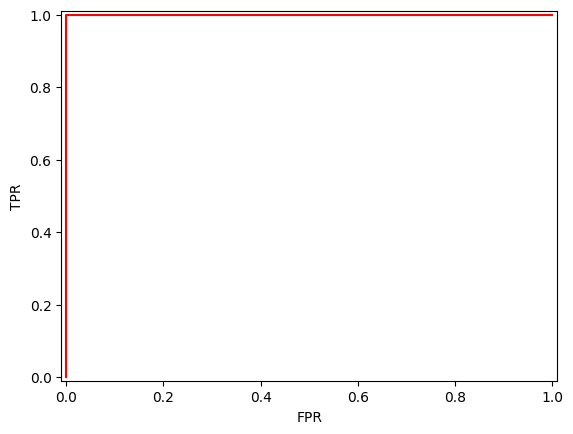

In [134]:
# ROC curves for each binary classification
Y_probab4 = model3.predict_proba(x2_val) 
fpr2, tpr2, threshold = roc_curve(y2_val, Y_probab4[:,1]) 

# Calculate the area under the roc curve
print("ROC-AUC of MLPClassifier: ",roc_auc_score(y2_val, Y_probab4[:,1]))

# Finally plot the ROC curve
plt.plot(fpr2, tpr2, color = "red")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Conclusion  <a class="anchor" id="conclusion"></a>

In [115]:
from rich.table import Table
from rich.console import Console

In [135]:
table = Table(title="Results")

table.add_column("Method", style="magenta")
table.add_column("Features", style="cyan", no_wrap=True)
table.add_column("Training time (s)", style="green")
table.add_column("Sensitivity", style="green")
table.add_column("Specificity", style="green")
table.add_column("Precision", style="green")
table.add_column("Accuracy", style="green")

table.add_row("NN", "All", f"{training_time_NN:.2f}", f"{sensitivityNN:.2f}", f"{specificityNN:.2f}", f"{precisionNN:.2f}", f"{accuracyNN:.2f}")
table.add_row("XGBoost", "All", f"{training_time_xgb:.2f}", f"{sensitivityXG:.2f}", f"{specificityXG:.2f}", f"{precisionXG:.2f}", f"{accuracyXG:.2f}")
table.add_row("NN", "Selected", f"{training_time_NN_reduct:.2f}", f"{sensitivityNNR:.2f}", f"{specificityNNR:.2f}", f"{precisionNNR:.2f}", f"{accuracyNNR:.2f}")
table.add_row("XGBoost", "Selected", f"{training_time_xgb_red:.2f}", f"{sensitivityXGR:.2f}", f"{specificityXGR:.2f}", f"{precisionXGR:.2f}", f"{accuracyXGR:.2f}")

console = Console()
console.print(table)

                                           Results                                           
┏━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Method  ┃ Features ┃ Training time (s) ┃ Sensitivity ┃ Specificity ┃ Precision ┃ Accuracy ┃
┡━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩
│ NN      │ All      │ 0.81              │ 0.91        │ 0.96        │ 0.95      │ 0.93     │
│ XGBoost │ All      │ 0.10              │ 1.00        │ 1.00        │ 1.00      │ 1.00     │
│ NN      │ Selected │ 0.88              │ 0.92        │ 0.96        │ 0.96      │ 0.94     │
│ XGBoost │ Selected │ 0.10              │ 1.00        │ 1.00        │ 1.00      │ 1.00     │
└─────────┴──────────┴───────────────────┴─────────────┴─────────────┴───────────┴──────────┘